# Practical Statistics for Data Scientists (Python)
# Chapter 2. Data and Sampling Distributions
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [ ]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [ ]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

Figure 2.1

## Random Sampling
A process in which eacg available member of the population being sampled has an equal chance of being chosen for the sample at each draw.

Sampling can be done *with replacement* -> observations are put back in the population after each draw for possible future reselection

**Simple random sample** - The sample that results from random sampling without stratifying the population (create different levels in the population).



## Sample Mean vs. Population Mean
$$\bar x$$ means sample mean
$$\mu$$ means population mean

## Regression to the Mean
Extreme observations tend to be followed by more central ones. Example: the children of tall men tend not to be as tall as thier father

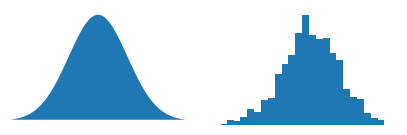

In [ ]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Sampling Distribution of a Statistic


**Sampling Variability**: Compare the diffrence among each samples drawn from the same population

**Central Limit Theorem**: The tendency of the sampling distribution to take on a normal shape as sample size rises. The means frawn from multiple samples will resemble bell-shape normal curve regardless the original data distribution.

**Standard Error**: Sum up the variability in the sampling distribution for a statistic. As sanoke size increases, standard error decreases
$$Standard \space Error = SE = \frac {s} {\sqrt{n}}$$

**Standard Deviation**: Square root of variance = s


To increase sample size, we will use **bootstrap**

In [ ]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


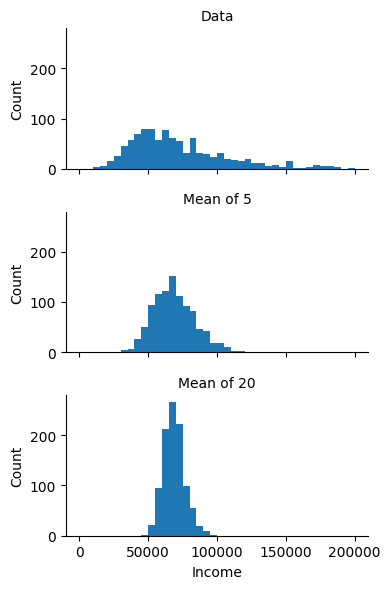

In [ ]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# The Bootstrap

The easy and effective way to estimate the sampling distribution of a statistic or of model parameters is to draw additional samples with replacement from the sample itself and recalculate the statistic or model for each resample.

Steps of bootstrap:
From a sample of size n
1. draw a sample value, record it, and then replace it
2. Repeat n times
3. Record the mean of the n resampled values
4. Repeat 1 to 3 steps R times
5. Use the R stsults to: 
    a. calcualte the standard deviation
    b. produce a histogram
    c. find confidence interval

In [ ]:
# using resample method in scikit-learn library 
# to compare the resample median with sample median
# resample with replacement from the original sample with the same sample size
# find the resample median and record it
# repeat the above two steps 1000 times
# calculate the mean of resample medians
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

# extra practice to compare the resample mean and sample mean
mean_results = []
for _ in range(5000):
    sample = resample(loans_income)
    mean_results.append(sample.mean())
mean_results = pd.Series(mean_results)
print(f"{loans_income.mean()}, {mean_results.mean()}")

Bootstrap Statistics:
original: 62000.0
bias: -88.09500000000116
std. error: 236.9108793190801
68760.51844, 68760.13129580801


# Confidence Intervals

The percentage of confidence intervals are expected to contain the statistic of interest

Example: 90% confidence intervals of a bootstrap mean indicates that the true mean is within the iterval 90% of the time using the similar samplimg percedure. 

68760.51844
55734.1


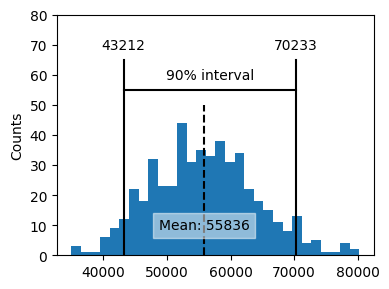

In [ ]:
# the true mean
print(loans_income.mean())

np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

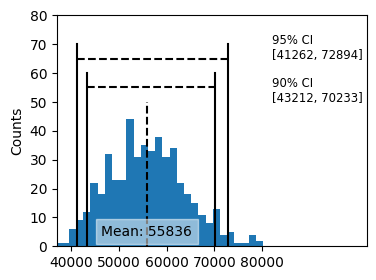

In [ ]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# Normal Distribution

**Standardize**: Subtract an individaul point by the mean and divide by the standrd deviation. Also called **Normalization**

**z-score**: The result of standardizing an individual data point

**68%** of the data lies within one standard deviation of the mean, **95%** lies within two standard deviations.

## Standard Normal and QQ-Plots

**QQ-Plot** is used to determine how close a sample is to a specified distribution, a normal distribution

- Y-axis of a QQ-plot is the z-score of each value
- X-axis of a QQ-plot is the corresponding quantile of a normal distribution

If the points roughly fall on the diagonal line, the sample distribution can be considered close to normal

The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.


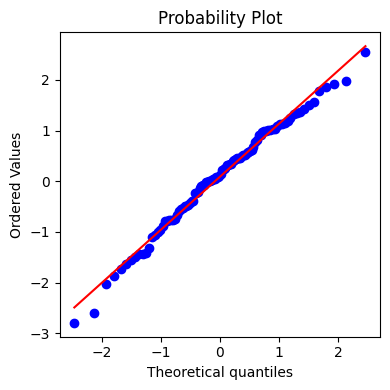

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## t-distribution and T-statistics
- used as a reference for the distribution of a sample mean
- compare the difference between two sample means, regression parameters, and other statistics

A 90% confidence interval around the sample mean is:

$$\bar x \pm t_{n-1}(0.05)\times \frac {s}{\sqrt{n}}$$


refernece: https://zhuanlan.zhihu.com/p/86188571


# Long-Tailed Distributions

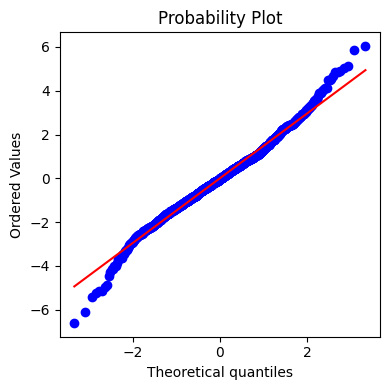

In [ ]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# Binomial Distribution

Assume there are only two outcomes
The binomial distribution is the frequency distribution of the number of success (x) in a given number of trials (n) with specified probability (p) of success in each trial.

$$p(x|n, p)=(\frac {n!}{x!(n-x)!})p^x(1-p)^{n-x}$$

- Mean of binomial distribution: n*p
- Variance: n*p(1-p)

With large sample size, the binomial distribution is closed to normal distribution as p is close to 0.5



In [ ]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.07289999999999992


In [ ]:
print(stats.binom.cdf(0, n=200, p=0.02))

0.017587946605721567


In [ ]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


# Chi-Square Distribution

- Chi-square distribution concerns with counts of subjects or items falling into categories
- Chi-square statistic is a measure of the extent ot which a set of observed values fots a specified distribution
- A low chi-square value for a set of counts indicates they closely follow the expected distribution
- Otherwise, thet differ from what is expected


# F-Distribution

- Similar to chi-square distribution, but conerns with continuous values rather than counts
- F-statistic is the ratio of the variability among the group means to the variability within each group.
- Used in ANOVA


# Poisson and Related Distribution
## Poisson Distributions

The distribution of events per unit of time or space when we sample many such units. (for events that occur at a constant rate)

$$p(x|\lambda)=\frac {e^{-\lambda}\lambda^x}{x!}$$
where $$\lambda$$ is the mean value of events that occurs in a specified interval of time or space.

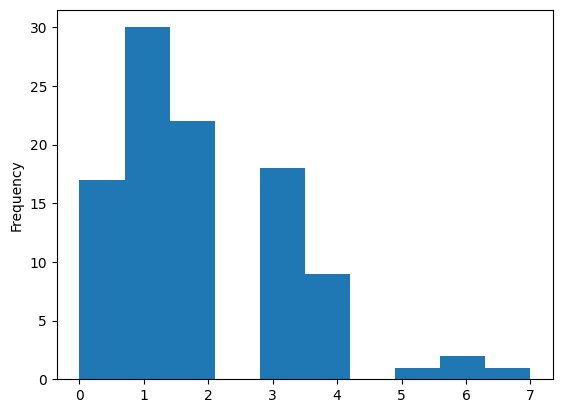

In [ ]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

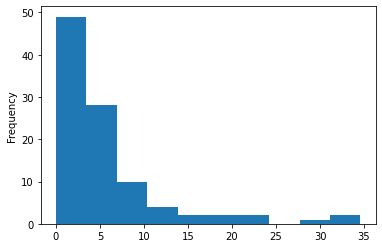

In [ ]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

##  Weibull Distribution

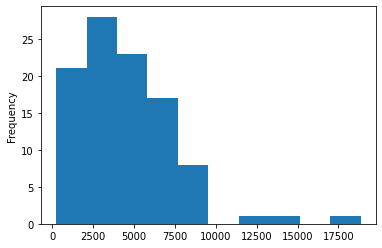

In [ ]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb61b3b3-7ab4-4e7c-a750-b396f9ef6b6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>